![](additional_data/report_images/acdc-header.png)

## ***Time Series Inverse Perspective Mapping (TS-IPM)***

### **Automated and Connected Driving Challenges - Research Project - *09/2023***

### **Research Topic *04 - Time Series Inverse Perspective Mapping***


| Author | Mail |
| --- | --- |
| *Batuhan Sakal* | *batuhansakal@rwth-aachen.de* |
| *Suchit Gupta* | *suchitgupta@rwth-aachen.de* |

## **Abstract**

**In the context of autonomous vehicles, accurately representing the environment is critical. One of the existing methods, Inverse Perspective Mapping (IPM), is commonly used for generating a Bird's Eye View (BEV) of the surroundings. However, IPM has inherent limitations, particularly in dealing with occlusions and inaccurate object localization. This paper introduces a methodology named "Time-Series Inverse Perspective Mapping", a modest adaptation of the traditional IPM method. It employs a temporal fusion of semantically segmented BEV images from multiple timestamps to reduce occlusion issues. The work described in this paper comprises three main aspects: development of an improved IPM tool using time-series data, a demonstration of this tool's ability to better identify occluded objects, and an exploration of the benefits of temporal data for enhancing scene comprehension. The aim of this study is to contribute to the field by improving the reliability of the IPM tool, thus enhancing the environmental perception for autonomous vehicles.**

## **Introduction**

Understanding and representing the environment accurately is vital for the operation of autonomous vehicles. This environment encompasses static components like road map and dynamic components such as other vehicles or pedestrians. The estimation of these environmental elements' distances, poses   a significant challenge, particularly with monocular cameras. Thus, creating reliable environmental representations, such as object lists or occupancy grids, which require specific world coordinates, becomes a critical aspect of autonomous vehicle technology.

The Bird's Eye View (BEV) technique is a notable approach for environment representation in the field of autonomous vehicles. This method, unlike capturing the full 3D world, provides a compact view of the spatial configuration of the scene, a format that is both simple to visualize and process. The benefit of a BEV is its rich semantic information, precise localization, and absolute scales, which directly aid in key applications like behavior prediction and motion planning. By presenting a comprehensive, top-down view of the environment, it allows a clear and uninterrupted overview of all static and dynamic elements in the vicinity. This view eliminates the blind spots typical of perspective views and greatly simplifies the computation of vehicle trajectories and navigation paths. As a result, it leads to more efficient and safer decision-making processes in autonomous driving.[3,4]

Cameras are particularly effective sensors for generating Bird's Eye View (BEV) representations for multiple reasons. First, they are cost-effective compared to other sensor technologies, making them a practical choice for large-scale implementations. Secondly, cameras provide rich visual data, capturing a broad range of colors and details that can be leveraged to extract high-level semantic information. This information is crucial in understanding the nuances of the environment for autonomous vehicles. Furthermore, well-established computer vision techniques can be employed to convert camera inputs from perspective views to BEV features. [1,3]

Monocular cameras inherently capture information confined to the image plane, but through the application of perspective transformation techniques, this can be translated into a top-down or Bird's Eye View (BEV). Essentially, this transformation recreates the scene as if the image plane was aligned with the ground, offering an approximation of the scene from an overhead or "bird's eye" perspective. [1] The first approach to this issue, known as Inverse Perspective Mapping (IPM), was introduced over thirty years ago, using a homography matrix to mathematically convert the flat ground from Perspective View to BEV. [2]

However, the IPM method used for generating the BEV images in autonomous cars has particular drawbacks. Its assumption of a flat world leads to visual distortions and inaccuracies in object localization, particularly when dealing with three-dimensional objects and changing road elevations. Additionally, occlusion caused by dynamic agents and static obstacles poses challenges to achieving accurate BEV representations. The method's lack of explicit incorporation of temporal information further hinders its ability to effectively eliminate occlusions. Therefore, there is a clear need to explore alternative approaches should be explored to address these limitations.[1,5]
Another aspect that IPM-derived Bird's Eye View images serves as a practical approach for bridging the spatial domain-gap between the input perspective images and the desired drone-sourced ground truth. Although deep neural networks have significantly advanced computer vision tasks by transforming diverse inputs into outputs, their high computational demands can be problematic during integration in the autonomous vehicle stack. IPM, despite its limitations, has the potential to generate images that closely resemble true BEV ground truth, thereby enhancing spatial consistency and enables the maximum extraction of contextual information effectively reducing the disparity between input and output images. Consequently, this alleviates the computational strain on neural networks, ultimately leading to a decrease in computational expenditure and increase efficiency.

Building on the observations and understandings discussed earlier, we propose an innovative approach in this paper, we propose a methodology to enhance the Inverse Perspective Mapping  tool, titled "Time-Series Inverse Perspective Mapping". The cornerstone of our approach is the temporal fusion of semantically segmented BEV images from multiple timestamps. We introduce a unique perspective to the understanding and the representation of the scene by accumulating sequential observations and leveraging the temporal data. This methodology assists in alleviating the effects of self-occlusion and external occlusions caused by the view-dependent properties of the camera.
The main contributions of this work are as follows:

    • A novel IPM tool capable of fusing multiple semantically segmented BEV images sequences over time, reducing the impact of camera view-dependent occlusions.
    
    • A demonstration of how temporal aggregation of observations can identify occluded objects and create reliable road maps.
    
    • Exploration of the role of temporal data in enhancing scene understanding, particularly in context to dynamic objects.
    
Through this work, we strive to contribute to the advancement of autonomous vehicles by enhancing the accuracy and reliability of the IPM tool, ultimately improving the perception of the environment and facilitating safer and more efficient autonomous driving.

Below overview of the Time Series Inverse Perspective Mapping (TS-IPM) Algoritmh is shown:


![TS-IPM Algoritim Overview](additional_data/report_images/TS-IPM_Algoritim_Overview.png)

## **Literature Review**

The body of literature in the field of autonomous vehicle technology categorizes Perspective to Bird's Eye View (P2BEV) transformations into two main approaches: geometry-based and network-based transformations. Each approach offers a unique strategy for handling the shift in perspective and has its own strengths and limitations. First the related work on different class based will be introduced and then, then the works introducing temporal information to the transformations.
Geometry-based methods for P2BEV transformations are split into two categories: homograph-based methods, which utilize simplified geometric relationships and depth-based methods, designed for more diverse practical scenarios. [12]

Cam2BEV[1] employs IPM on semantically segmented images from multiple vehicle-mounted cameras to produce preliminary input, which is then refined and correct through a neural network architecture. 

In the study conducted by Abbas et al.[4], Convolutional Neural Networks are employed to to estimate the vertical vanishing points and ground plane vanishing lines (horizon) within perspective view images. These estimated parameters are then utilized to calculate the homography matrix.

BEVStitch [5] applies a dual-branch method to segment and transform ground projections of objects   and roads into BEV space using IPM. It uses a temporal aggregation module to integrate information from a monocular video sequence, consolidating feature maps into a coherent BEV space using ego pose data. The model also employs concatenation, max, and mean functions for temporal feature wrapping, and supervises intermediate features using reprojected BEV ground truth.

BridgeGAN[8], a generative model, addresses the severe deformation and gap between perspective and BEV. It uses a multi-GAN-based model with an intermediate homography view for better cross-view translation, producing superior BEV images in terms of detail and global consistency.

LSS[10] combines pixel-wise depth prediction with probabilistic 3D lifting to convert perspective images into 3D point clouds. These point clouds are then mapped onto a BEV using camera extrinsics and refined using a BEV-specific CNN and integrated across multiple cameras onto a common BEV plane.

An alternative to geometry-based methods is the data-driven approach, which models the view transformation using neural networks, such as MLPs and transformers, as a mapping function between perspective view (PV) and Bird's Eye View (BEV), leveraging camera geometry implicitly to cover complex transformations like homography.

PON[3] employs a dense transformer module with a semantic Bayesian occupancy grid framework to create BEV HD maps directly from monocular images.  By utilizing a feature pyramid , it extracts high-resolution details and spatial context, focusing on small objects.

In VPN[7], a two-layer MLP is employed to transform PV feature maps to BEV feature maps. A camera-specific view transformer module, implemented as an MLP, is used for data-driven perspective-to-BEV warping. Multi-view fusion is achieved by adding feature maps from different cameras.

PanopticSeg[9] introduces a method for BEV panoptic segmentation using a single monocular image, employing a transformer module that uses IPM for error correction, flat BEV feature generation, and 3D space modeling.

BEVDet4D[11] advances 3D object detection in BEV space by incorporating temporal 4D data, aligning and concatenating BEV feature maps across frames. It improves velocity prediction accuracy by comparing features from consecutive frames and eliminating ego-motion and time factors, resulting in a substantial reduction in velocity error.

#### **Dependencies & Setup**

In [4]:
# !-- Before any code cell can be executed, make sure that you have Jupyter installed in your Python environment. --!
#     !pip install jupyter

# === INSTALLATION OF PYTHON DEPENDENCIES ==========================

# install packages via pip
!{sys.executable} -m pip install \
    jupyter \
    tensorflow-gpu==2.10.0 \
    matplotlib==3.5.2 \
    opencv-python~=4.7.0.72 \
    numpy~=1.22.3 \
    tqdm~=4.62.1 \
    PyYAML \
    Pillow

     |████████████████████████████████| 11.2 MB 3.2 MB/s eta 0:00:01
  Using cached protobuf-3.19.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
     |████████████████████████████████| 4.5 MB 14.0 MB/s eta 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.


#### Import Libraries

In [5]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from PIL import Image

from additional_data.convert_npz_to_png import *

## **Methodology**

### **Overview**

In this section, we outline the methodology for the proposed "Time-Series Inverse Perspective Mapping (TS-IPM)" approach, which aims to enhance the accuracy and reliability of the Inverse Perspective Mapping (IPM) tool for generating Bird's Eye View (BEV) representations of the environment in the context of ego-centric environment representation. The key idea is to leverage temporal data and fusion of semantically segmented BEV images from multiple timestamps to reduce the impact of camera view-dependent occlusions and improve scene understanding, particularly for dynamic objects.

The core of this research revolves around enhancing the existing IPM tool with the introduction of the Time-Series Inverse Perspective Mapping (TS-IPM) technique. This methodology specifically focuses on temporal fusion and semantic segmentation to mitigate challenges faced in conventional IPM approaches. The process can be broadly divided into the following key components:

0. **Data Collection**
1. **Preprocessing and Semantic Segmentation**
2. **Development of the Time-Series Inverse Perspective Mapping (TS-IPM) Tool**
3. **Post Processing**
4. **Evaluation and Validation**

**Please Note: Throughout this report there will be executable cells which will each execute a particular step in the algorithm. Here the execution is set up for an example dataset consisting of only 10 images. However, the results can be reproduced on a desired dataset by changing either the image and config files in the corresponding paths of the directory ```example_data``` or creating another directory with similar structure and changing the input and output names in the first executable cell in each section that follows!** 😀

### **0. Data Collection**

The first step in implementing the methodology is to collect appropriate data that will serve as the foundation for developing and validating the **Time-Series Inverse Perspective Mapping (TS-IPM)** technique. This data collection should include these data:

- **Monocular Camera Images**: These cameras should capture raw perspective view images that encompass a variety of scenarios such as different road conditions, traffic situations, and environmental elements.

- **Drone-Sourced Images**: In addition to the monocular cameras,  accurate BEV representations of the scenes should be collected as ground truth data. This data is essential for later comparisons and validation of the generated BEV images using the TS-IPM technique.

- **Annoted Label Data**: Appropriate annotated labels should be generated to provide the training data to the segmentation model and ground truth for TS-IPM algorithm to evaluate.

- **Camera Intrinsic and Extrinsic Parameters**: For each image dataset, both intrinsic and extrinsic parameters of the camera shall be available. The intrinsic parameters include aspects like focal length, optical center, and lens distortion, while the extrinsic parameters describe the position and orientation of the camera in the world coordinate system. These parameters are vital for the accurate transformation of perspective views into Bird's Eye Views.

Data collection and annotation pose significant challenges in utilizing bird's eye view. One proposed solution is to use a drone that follows the autonomous vehicle, with humans then tasked with semantic segmentation annotation - a method that is impractical and not scalable. Consequently, many studies in the field have used simulation to generate necessary synthetic data and annotations to convert perspective images into bird's eye view. To overcome the simulation-to-reality (sim2real) domain gap, semantic segmentation is often utilized as an intermediate representation.[1,6,7] By leveraging semantic segmentation results, the mapping algorithm can accurately identify and extract the relevant road surface and objects, enabling a more precise bird's eye view representation. 

In our project we employ this approach either, we also utilized a similar stratategy and used the data set provided by RWTH - IKA. 
Download from - https://rwth-aachen.sciebo.de/s/fbC6sBbs4W06b96

The dataset consists of two main synthetic collections: one depicting a static world with only the ego vehicle's movement, and the other representing a dynamic world with additional traffic participants. Both subsets offer data from five cameras, including four vehicle-mounted (front, rear, left, right) and one drone camera (1449 images per view for static dataset and 1322 images per view for dynamic dataset). The data includes actual images as well as semantically segmented ground truth images.

The structure of the dataset is organized into folders for dynamic and static worlds, further subdivided into cameras, ego data, and semantic segmentation. The ego data provides detailed information about the ego vehicle's state including its position, velocity, acceleration, heading, and dimension. Files with timestamps enable the synchronization of data across different sources.

The dataset also comes with ROS bag files and essential information regarding camera configurations. This includes details about camera intrinsics like focal length and extrinsics like pose, compatible with the provided IPM implementation. Additionally, the color-coding of the semantic classes is defined and can be interpreted using the specific script.

### **1. Semantic Segmentation**

The next step is to employ state-of-the-art semantic segmentation techniques to label the objects in the perspective view images. Semantic segmentation assigns class labels (e.g., vehicles, pedestrians, road, sidewalk) to each pixel in the images, thereby creating semantically segmented perspective view images. However, since in this project, we would like to compute segmentation scores over temporally stitched images and not for individual images, we save the top thee class prediction data for each image. The method and format in which this is done is explained at the end of this section. 

The project utilized the U-net architecture for image segmentation, tailored for each camera perspective including front, rear, left, right, and drone views. Adapted from the Automated and Connected Driving Challenges (ACDC) course taught by IKA, RWTH Aachen University. A copy on the original code can be found in the ```additional_data/semantic_segmentation``` directory. In case you want to train the model on a different dataset, please follow the instructions in the ```1_semantic_image_segmentation.ipynb``` file located in this directory.

For this project, the model was trained for only 30 epochs with various training data. A segmentation error was then calculated for the various parameters thus obtained and the model with least error over all datasets was chosen as the ```final_model``` after training it for a further 100 epochs. The error results for each training dataset can be viewed [here](additional_data/segmentation_model_error.png). As seen, the ```shuffled model all``` performed best and was thus selected. In this model, the entire dataset (static and dynamic images) in all views was considered to be the training dataset.
**Note:** All training datasets were shuffled before processing and for all datasets only 60% was considered as train data and 20% as validation data. The remaining 20% acted as test data (also for the ```final_model```).

However the output representation is modified from that in the ACDC course and does not give segmented images directly. Instead we get a ```.npz file``` for each image, which stores array data of the shape ```[image_height, image_width, 3]```. This is achieved by removing the final ```softmax layer``` in the U-Net.   
Each value is stored in a ```numpy array``` as ```prediction_index + prediction_probability``` where ```prediction_index``` forms the integral part of the data and ```prediction_probability``` forms the fractional part. Since we want to have consistancy in the shape of the input image and output file, we store only the highest three probability values (top 3 prediction scores and indices at each pixel region) given by the modified U-Net.    
Thus we obtain the output for each image as a ```numpy array``` of size ```[image_height, image_width, 3]``` and save it in the ```.npz format```.   
**Note:** Since outputs are not in ```.png format```, they cannot be viewed directly. To view the image, please use the ```convert_npz_to_png.ipynb``` script found [here](additional_data/convert_npz_to_png.ipynb).

In [6]:
from python_scripts.segmentation import *

In [7]:
# Set parameters (change for different input)

input_shape = [512, 1024, 3]
num_classes = 9

model_parameters = "model/model"

images_front_path = "example_data/front"
output_front_path = "example_outputs/segmented_image_files/front"

images_left_path = "example_data/left"
output_left_path = "example_outputs/segmented_image_files/left"

images_rear_path = "example_data/rear"
output_rear_path = "example_outputs/segmented_image_files/rear"

images_right_path = "example_data/right"
output_right_path = "example_outputs/segmented_image_files/right"

In [8]:
# Run Image Segmentation

segmentation_model = SegmentationModel(input_shape, num_classes)

segmentation_model.load_weights(model_parameters)

segmentation_model.predict(images_front_path, output_front_path)
segmentation_model.predict(images_left_path, output_left_path)
segmentation_model.predict(images_rear_path, output_rear_path)
segmentation_model.predict(images_right_path, output_right_path)

right done...


**A visualization of image segmentation using one of the examples** 

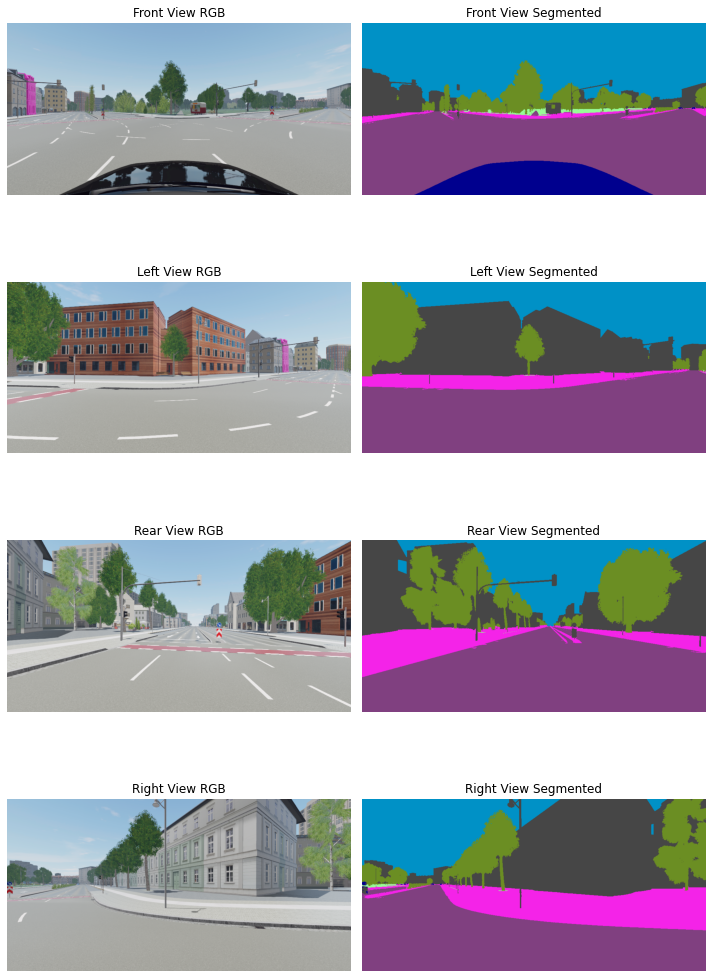

In [9]:
view_segmentation = File_to_Image()

front_view_rgb = Image.open('example_data/front/example_scene_0.png')
front_view_seg = view_segmentation.get_converted_image('example_outputs/segmented_image_files/front/example_scene_0.npz')

left_view_rgb = Image.open('example_data/left/example_scene_0.png')
left_view_seg = view_segmentation.get_converted_image('example_outputs/segmented_image_files/left/example_scene_0.npz')

rear_view_rgb = Image.open('example_data/rear/example_scene_0.png')
rear_view_seg = view_segmentation.get_converted_image('example_outputs/segmented_image_files/rear/example_scene_0.npz')

right_view_rgb = Image.open('example_data/right/example_scene_0.png')
right_view_seg = view_segmentation.get_converted_image('example_outputs/segmented_image_files/right/example_scene_0.npz')

# Create a subplot
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# Display the front view
axes[0][0].imshow(front_view_rgb)
axes[0][0].set_title('Front View RGB')
axes[0][1].imshow(front_view_seg)
axes[0][1].set_title('Front View Segmented')

# Display the left view
axes[1][0].imshow(left_view_rgb)
axes[1][0].set_title('Left View RGB')
axes[1][1].imshow(left_view_seg)
axes[1][1].set_title('Left View Segmented')

# Display the rear view
axes[2][0].imshow(rear_view_rgb)
axes[2][0].set_title('Rear View RGB')
axes[2][1].imshow(rear_view_seg)
axes[2][1].set_title('Rear View Segmented')

# Display the right view
axes[3][0].imshow(right_view_rgb)
axes[3][0].set_title('Right View RGB')
axes[3][1].imshow(right_view_seg)
axes[3][1].set_title('Right View Segmented')

# Turn off axis labels for all subplots
for ax in fig.get_axes():
    ax.axis('off')
    
# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

### **2. Development of the Time-Series Inverse Perspective Mapping (TS-IPM) Tool**

####  **2.1. Inverse Perspective Mapping (IPM)**

The semantically segmented files are then fed into the traditional Inverse Perspective Mapping (IPM) tool (CAM2BEV from IKA). The IPM tool uses a homography matrix to mathematically transform from the perspective view to the Bird's Eye View (BEV).   
In this project, we provide the input as four temporaly corresponding perspective view (front, left, rear, right) segmented files to the IPM script and recieve one output file in the BEV. It must be noted here that since we have inputs as ```.npz files```  instead of ```.png files```, the original CM2BEV script was slightly edited and in this project, we get the IPM outputs as ```.npz files``` itself.   
This works well, since the IPM is essentially just a transformation algorithm and our input matrix is the same size as what is expected by the IPM tool (```[image_height, image_width, 3]```).   
**Note:** Since outputs are not in ```.png format```, they cannot be viewed directly. To view the image, please use the ```convert_npz_to_png.ipynb``` script found [here](additional_data/convert_npz_to_png.ipynb).

In [10]:
# change all path names for different input

%run python_scripts/ipm --cc --batch --drone example_data/camera_configs/drone.yaml --output example_outputs/ipm_files example_data/camera_configs/front.yaml example_outputs/segmented_image_files/front example_data/camera_configs/rear.yaml example_outputs/segmented_image_files/rear example_data/camera_configs/left.yaml example_outputs/segmented_image_files/left example_data/camera_configs/right.yaml example_outputs/segmented_image_files/right

100%|██████████████████████| 10/10 [00:03<00:00,  2.96it/s, example_scene_9.npz]


**A visualization of IPM using one of the examples**

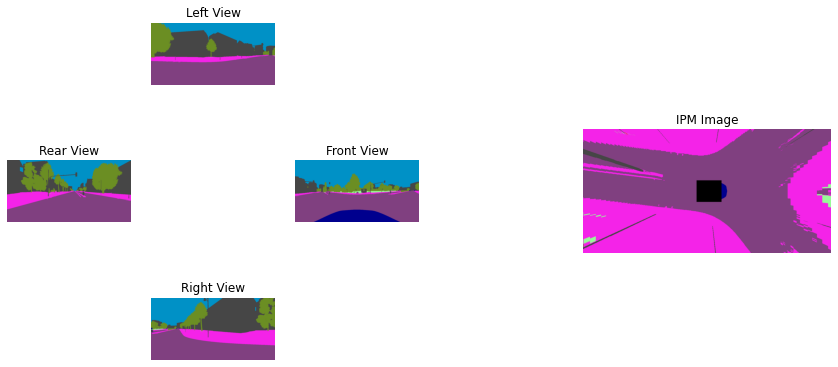

In [11]:
view_ipm = File_to_Image()

front_view = view_ipm.get_converted_image('example_outputs/segmented_image_files/front/example_scene_0.npz')
left_view = view_ipm.get_converted_image('example_outputs/segmented_image_files/left/example_scene_0.npz')
rear_view = view_ipm.get_converted_image('example_outputs/segmented_image_files/rear/example_scene_0.npz')
right_view = view_ipm.get_converted_image('example_outputs/segmented_image_files/right/example_scene_0.npz')
ipm_view = view_ipm.get_converted_image('example_outputs/ipm_files/example_scene_0.npz')

# Create a figure and a GridSpec
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(3, 5, figure=fig, width_ratios=[1, 1, 1, 1, 2])

# Plot the Front View
ax0 = fig.add_subplot(gs[1, 2])
ax0.imshow(front_view)  
ax0.set_title('Front View') 
ax0.axis('off')

# Plot the Left View
ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(left_view) 
ax1.set_title('Left View') 
ax1.axis('off')

# Plot the Rear View
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(rear_view) 
ax2.set_title('Rear View')
ax2.axis('off')

# Plot the Right View
ax3 = fig.add_subplot(gs[2, 1])
ax3.imshow(right_view)  
ax3.set_title('Right View')  
ax3.axis('off')

# Plot the IPM Image
bigger_ax = fig.add_subplot(gs[:, 4])  
bigger_ax.imshow(ipm_view)  
bigger_ax.set_title('IPM Image') 
bigger_ax.axis('off')

# Adjust spacing and display the plot
plt.tight_layout(pad=2.0)
plt.show()

#### **2.2.  Time Series - Temporal Fusion**

The core innovation of the proposed methodology lies in the temporal fusion of semantically segmented BEV files from multiple timestamps to give a better segmented scene representation compared to traditional segmentation + IPM algorithms.   
In this project, the BEV file generated by the modified IPM tool are stacked over a few time frames (taking images from the recent past and possibly the immediate future of the reference image), creating a time-series representation of the environment. In order to make the temporal alignment across these images more accurate, before fusing the image scenes, we transform the images to the reference image's scene using the Ego-vehicle motion data provided. We then stack the images along the 4th dimension of an array to get the shape ```[image_height, image_width, 3, number_of_temporal_images]```.   
The fusion process itself leverages the fact that we have data accross all pixels in each image for not just 1 class, but for the top 3 most probable classes. At each pixel location, probability values accross the last two dimensions are summed up (only frational part corresponding to ```prediction_probability```). After summing, the corresponding integral value (```prediction_index```) is obtained as an ```argmax``` function over all classes. This gives us a ```one_hot_encoding``` for the temporally fused image, which in turn is converted to an rgb image using the ```rgb_to_class_id```.   
Further, to improve the temporally fused image output, a ```wt_decay``` factor was added to allow more weightage to probability values of those frames closer to the referance frame and lower weightage to those temporarlly away from it. The ```wt_decay``` term acts as a hyperparameter and is applied as an exponential decay. For example, for ```wt_decay=0.8``` and referance frame = 10, factor will be applied as (frame_10_probability)*0.8<sup>0</sup>
(frame_9_probability)*0.8<sup>1</sup>, (frame_8_probability)*0.8<sup>2</sup>...   
This TS_IPM method leverages temporal data, enhancing scene understanding and reducing the impact of occlusions caused by the view-dependent properties of the camera.   
**Note:** Fused images are saved with the name of the corresponding reference image.

In [12]:
import glob
from python_scripts.stitching import *

In [13]:
# Set parameters (change for different input)

images_path = "example_outputs/ipm_files"
ego_motion_path = "example_data/ego_data"
output_path = "example_outputs/fused_images"

number_images_before = 3
number_images_after = 0

number_of_classes = 9

wt_decay = 0.8

In [14]:
# Do not modify !!!
images_path = sorted(glob.glob(os.path.join(images_path, "*.npz")))
ego_motion_path = sorted(glob.glob(os.path.join(ego_motion_path, "*.json")))

In [15]:
# Run Image Fusing

stitch_images = Stitch_Images(images_path, ego_motion_path, output_path, number_images_before, number_images_after, number_of_classes, wt_decay)
stitch_images.main()

stitching image 7 out of 7


**A visualization of Image Fusing using one of the examples**

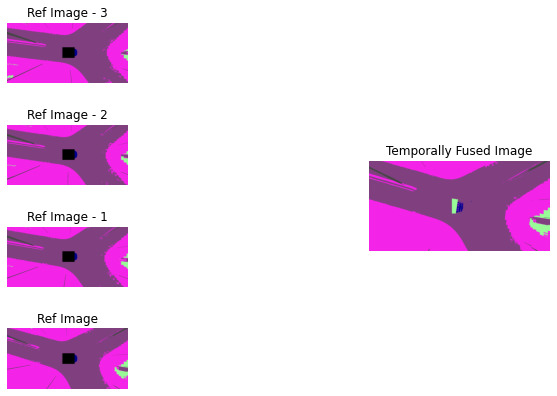

In [16]:
view_stitched = File_to_Image()
front_view = view_segmentation.get_converted_image('example_outputs/segmented_image_files/front/example_scene_0.npz')

prev_image_3 = view_stitched.get_converted_image('example_outputs/ipm_files/example_scene_0.npz')
prev_image_2 = view_stitched.get_converted_image('example_outputs/ipm_files/example_scene_1.npz')
prev_image_1 = view_stitched.get_converted_image('example_outputs/ipm_files/example_scene_2.npz')
ref_image = view_stitched.get_converted_image('example_outputs/ipm_files/example_scene_3.npz')
stitched_image = Image.open('example_outputs/fused_images/example_scene_3.png')

# Create a figure and a GridSpec
fig = plt.figure(figsize=(12, 6))  
gs = GridSpec(4, 6, figure=fig, width_ratios=[1, 1, 1, 1, 0.5, 1.5])  

# Plot the Ref Image - 3
ax0 = fig.add_subplot(gs[0, 2])
ax0.imshow(prev_image_3)  
ax0.set_title('Ref Image - 3') 
ax0.axis('off')

# Plot the Ref Image - 2
ax1 = fig.add_subplot(gs[1, 2])
ax1.imshow(prev_image_2)  
ax1.set_title('Ref Image - 2')  
ax1.axis('off')

# Plot the Ref Image - 1
ax2 = fig.add_subplot(gs[2, 2])
ax2.imshow(prev_image_1)  
ax2.set_title('Ref Image - 1')  
ax2.axis('off')

# Plot the Ref Image
ax3 = fig.add_subplot(gs[3, 2])
ax3.imshow(ref_image)  
ax3.set_title('Ref Image')  
ax3.axis('off')

# Plot the Stitched Image
bigger_ax = fig.add_subplot(gs[:, 5]) 
bigger_ax.imshow(stitched_image)  
bigger_ax.set_title('Temporally Fused Image')  
bigger_ax.axis('off')

# Adjust spacing between subplots and display the plot
plt.tight_layout(pad=2.0)  
plt.show()

### **3. Post Processing**

As we can see in the example above, the Ego Vehicle's body is allocated a random class (terrain in this case) during the temporal fusion process. Hence, in order to obtain accurate results the temporally fused images need to undergo one more processing step. As it is visible from the temporally fused image output, a part of the Ego-Vehicle is visible during the ipm process (this corresponds to the hood of the car which is visible in the front view of the camera). However, we do not wish to consider our Ego-vehicle at all during the evaluation and validation of our results. Therefore, in this step, we remove the Ego-vehicle object by masking it with all black pixels.     
**Note:** Post Processed images are saved with the same name as that of the corresponding fused output image.

In [17]:
from python_scripts.image_processor import *

In [18]:
# Set parameters (change for different input)

ipm_path = "example_outputs/ipm_files"
stitched_path = "example_outputs/fused_images"
output_path = "example_outputs/processed_images"

In [19]:
# Run Image Processing

process_images = ImageProcessor()
process_images.main(ipm_path, stitched_path, output_path)

 processing image 7 out of 7


**A visualization of Post Processing using one of the examples**

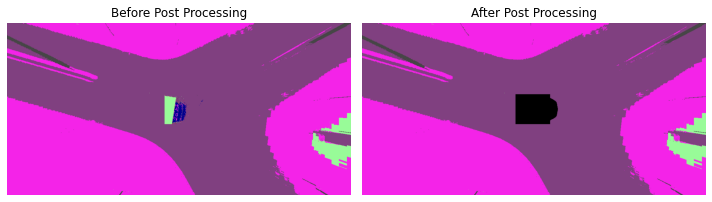

In [20]:
input_image = Image.open('example_outputs/fused_images/example_scene_3.png')
output_image = Image.open('example_outputs/processed_images/example_scene_3.png')

# Create a subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the input image
axes[0].imshow(input_image)
axes[0].set_title('Before Post Processing')

# Display the input image
axes[1].imshow(output_image)
axes[1].set_title('After Post Processing')

# Turn off axis labels for all subplots
for ax in fig.get_axes():
    ax.axis('off')
    
# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

### **4. Evaluation and Validation**

To assess the performance of the proposed Time-Series Inverse Perspective Mapping (TS-IPM) algorithm, a comprehensive evaluation was  conducted, comparing its results to those obtained from the traditional single-shot IPM method. Both algorithms were evaluated against the ground truth bird's eye view data. The evaluation focuses on several key aspects, including accuracy, robustness, and temporal dependency. The suggested metric for performance evaluation is the Intersection over Union(IoU) and Mean IoU, a widely used metric in semantic segmentation tasks. The following evaluation methods were employed for validating the TS-IPM algorithm:

#### **1. Dependence on the Number of Included Time Steps**

In order to examine the effect of temporal fusion on TS-IPM outcomes, we evaluated the algorithm using different numbers of temporal frames as inputs. This temporal fusion process accumulates observations across multiple timestamps, incorporating a ```wt_decay```  term. Adjusting the number of timesteps provides insights into the efficacy of temporal fusion in attaining precise environmental representations.

To determine the optimal number of time series for our algorithm, we visually and statistically assessed various scenes using the Mean Intersection over Union (MIoU) metric for TS-IPM. This evaluation included 3 previous timesteps, 5 previous timesteps, and 10 previous timesteps. An illustrative sample of the outcomes is presented below: 
![](additional_data/report_images/1-1.png)   
We noted that using merely 3 prior frames did not yield sufficient enhancements over the conventional IPM. Conversely, incorporating 10 preceding frames led to data loss at the image's border areas. Hence, for this specific dataset, utilizing 5 previous frames was deemed optimal for the temporal fusion process.

Intersection over Union (IOU) and MIoU scores were computed for 3, 5, and 10 prior timesteps across both static and dynamic datasets.
The results for the static dataset can be seen [here](additional_data/miou_results/miou_static_temporal.png) and those for the dynamic dataset can be seen [here](additional_data/miou_results/miou_dynamic_temporal.png). 

#### **2. Comparison with Single-shot IPM Method and Ground Truth BEV Data**

To evaluate the improvement obtained, we compare the TS-IPM results with those from the traditional single-shot IPM method and ground truth bird's eye view (BEV) data. The Mean IoU metric was used to quantify the similarity between the predicted BEV representation by TS-IPM and the ground truth.   Additionally, the Mean IoU was calculated for the single-shot IPM results to establish a baseline for comparison. This comparison provides insight into the improvements achieved by the proposed TS-IPM methodology. 

To evaluate the improvements achieved, we compared the TS-IPM outcomes with the traditional single-shot IPM method and the ground truth bird's eye view (BEV) data. We employed the Mean IoU metric to measure the congruence between the BEV representation predicted by TS-IPM and the ground truth. Additionally, we computed the Mean IoU for the single-shot IPM results to to establish a baseline for comparison. This comparison provides insight into the improvements achieved by the proposed TS-IPM methodology. 

Illustrative examples of this comparison are displayed below:
![](additional_data/report_images/2-1.png)  
![](additional_data/report_images/2-2.png)   
With TS-IPM, we noticed a reduction in the distortions of vertically extended objects in the scene, such as trees and poles. Furthermore, artifacts introduced during the IPM process were partially mitigated, and the decline in resolution with increasing distance was noticeably improved in the border of the images.

The computed average MIoU for all classes, as well as the final MIoU over the entire static dataset for both IPM vs Ground Truth and fused Image vs Ground Truth, are accessible [here](additional_data/miou_results/miou_ipm_vs_stitched_static.png). These results were derived using a decay factor of 0.8 and by fusing data from 5 prior frame images to the reference frame's scene. Notably, the fused image's MIoU exhibited an approximately 2% enhancement compared to the IPM when both were gauged against ground truth data.

#### **3. Performance on Flat-World, Static Objects, and Dynamic Objects**

To assess the TS-IPM algorithm's efficacy across various scenarios, we computed the Mean IoU for distinct categories: flat-world regions, static objects, and dynamic objects. This distinction allows us to discern how adeptly TS-IPM addresses diverse environmental components. "Flat-world regions" denote areas with uniform road surfaces, "static objects" comprise stationary elements such as buildings and road signs, and "dynamic objects" include moving entities like vehicles and pedestrians. Evaluating the algorithm's performance for these specific categories offers a comprehensive view of its capabilities and limitations.



To analyse this, consider a scene as shown below-   
![](additional_data/report_images/3-1.png)   
As evidenced, most occlusions due to vertical distortions of object are mitigated. However, the algorithm's performance diminishes in the presence of sizable objects, such as cars.

Given that the IoU results in the aforementioned table might not be intuitively understand the results, we further explain these outcomes using binary segmentation maps to visually investigate and validate our findings. In these maps, each class is graphically represented, facilitating a clearer comprehension of the results. An exemplar binary segmentation map (highlighting specific classes) is depicted below:  
![](additional_data/report_images/binary_segmentation_map.png)   

Finally, to observe and evaluate a real case of a scene with dynamic objects such as cars, pedestrians,etc. we provide a more complex scene example-   
![](additional_data/report_images/3-2.png)

Here, it's evident that the TS-IPM method loses the pedestrian data. This oversight occurs from the unpredictable movement patterns of pedestrians, which aren't factored into the temporal fusion process. Hence, while the results in the previously discussed sections are promising, challenges emerge when dynamic entities populate the scene since their movements aren't compensated for within the TS-IPM algorithm's framework.

The computed average MIoU for all classes (incorporating non-zero values for dynamic objects) and the final MIoU across the entire dynamic dataset, comparing IPM vs Ground Truth and Fused Image vs Ground Truth, are accessible [here](additional_data/miou_results/miou_ipm_vs_stitched_dynamic.png). These outcomes were derived using a decay factor of 0.8 and by fusing data from 5fpreceding frame images with the reference frame's scene. Notably, the fused image's MIoU displays an approximate 2.5% uplift compared to the IPM when compared against ground truth data.

**A visualization of Evaluation Process using one of the examples**

In [21]:
from python_scripts.evaluation import *

In [22]:
# Set parameters (change for different input)

ground_truth_images_path = "example_data/drone_ground_truth"
ipm_labels_path = "example_outputs/ipm_files"
fused_images_path = "example_outputs/processed_images"

In [23]:
# Run Image Processing

evaluation = Evaluate_miou()
evaluation.compute_average_miou(ground_truth_images_path, ipm_labels_path, fused_images_path)

IPM vs Ground Truth
-------------------------------------
Class Name                  | IoU
-------------------------------------
Class 0 - Terrain/Ground    | 0.12079754684652601
Class 1 - Road              | 0.8517697623797825
Class 2 - Sidewalk/Parking  | 0.0
Class 3 - Building/Obstacle | 0.03433896218692618
Class 4 - Vegetation        | 0.0
Class 5 - Person            | 0.0
Class 6 - Rider/Motorcycle  | 0.0
Class 7 - Car/Truck/Bus/Van | 0.0
Class 8 - Sky               | 0.0

MIoU = 0.33563543217522757
-------------------------------------
Stitched Image vs Ground Truth
-------------------------------------
Class Name                  | IoU
-------------------------------------
Class 0 - Terrain/Ground    | 0.25322111589568
Class 1 - Road              | 0.8613548108509609
Class 2 - Sidewalk/Parking  | 0.7393166507993426
Class 3 - Building/Obstacle | 0.033194515854120255
Class 4 - Vegetation        | 0.07829423795919865
Class 5 - Person            | 0.0
Class 6 - Rider/Motorcycle  | 

In [24]:
view_ipm = File_to_Image()
ipm_image = view_ipm.get_converted_image('example_outputs/ipm_files/example_scene_3.npz')

ground_truth_image = Image.open('example_data/drone_ground_truth/example_scene_3.png')
fused_image = Image.open('example_outputs/processed_images/example_scene_3.png')

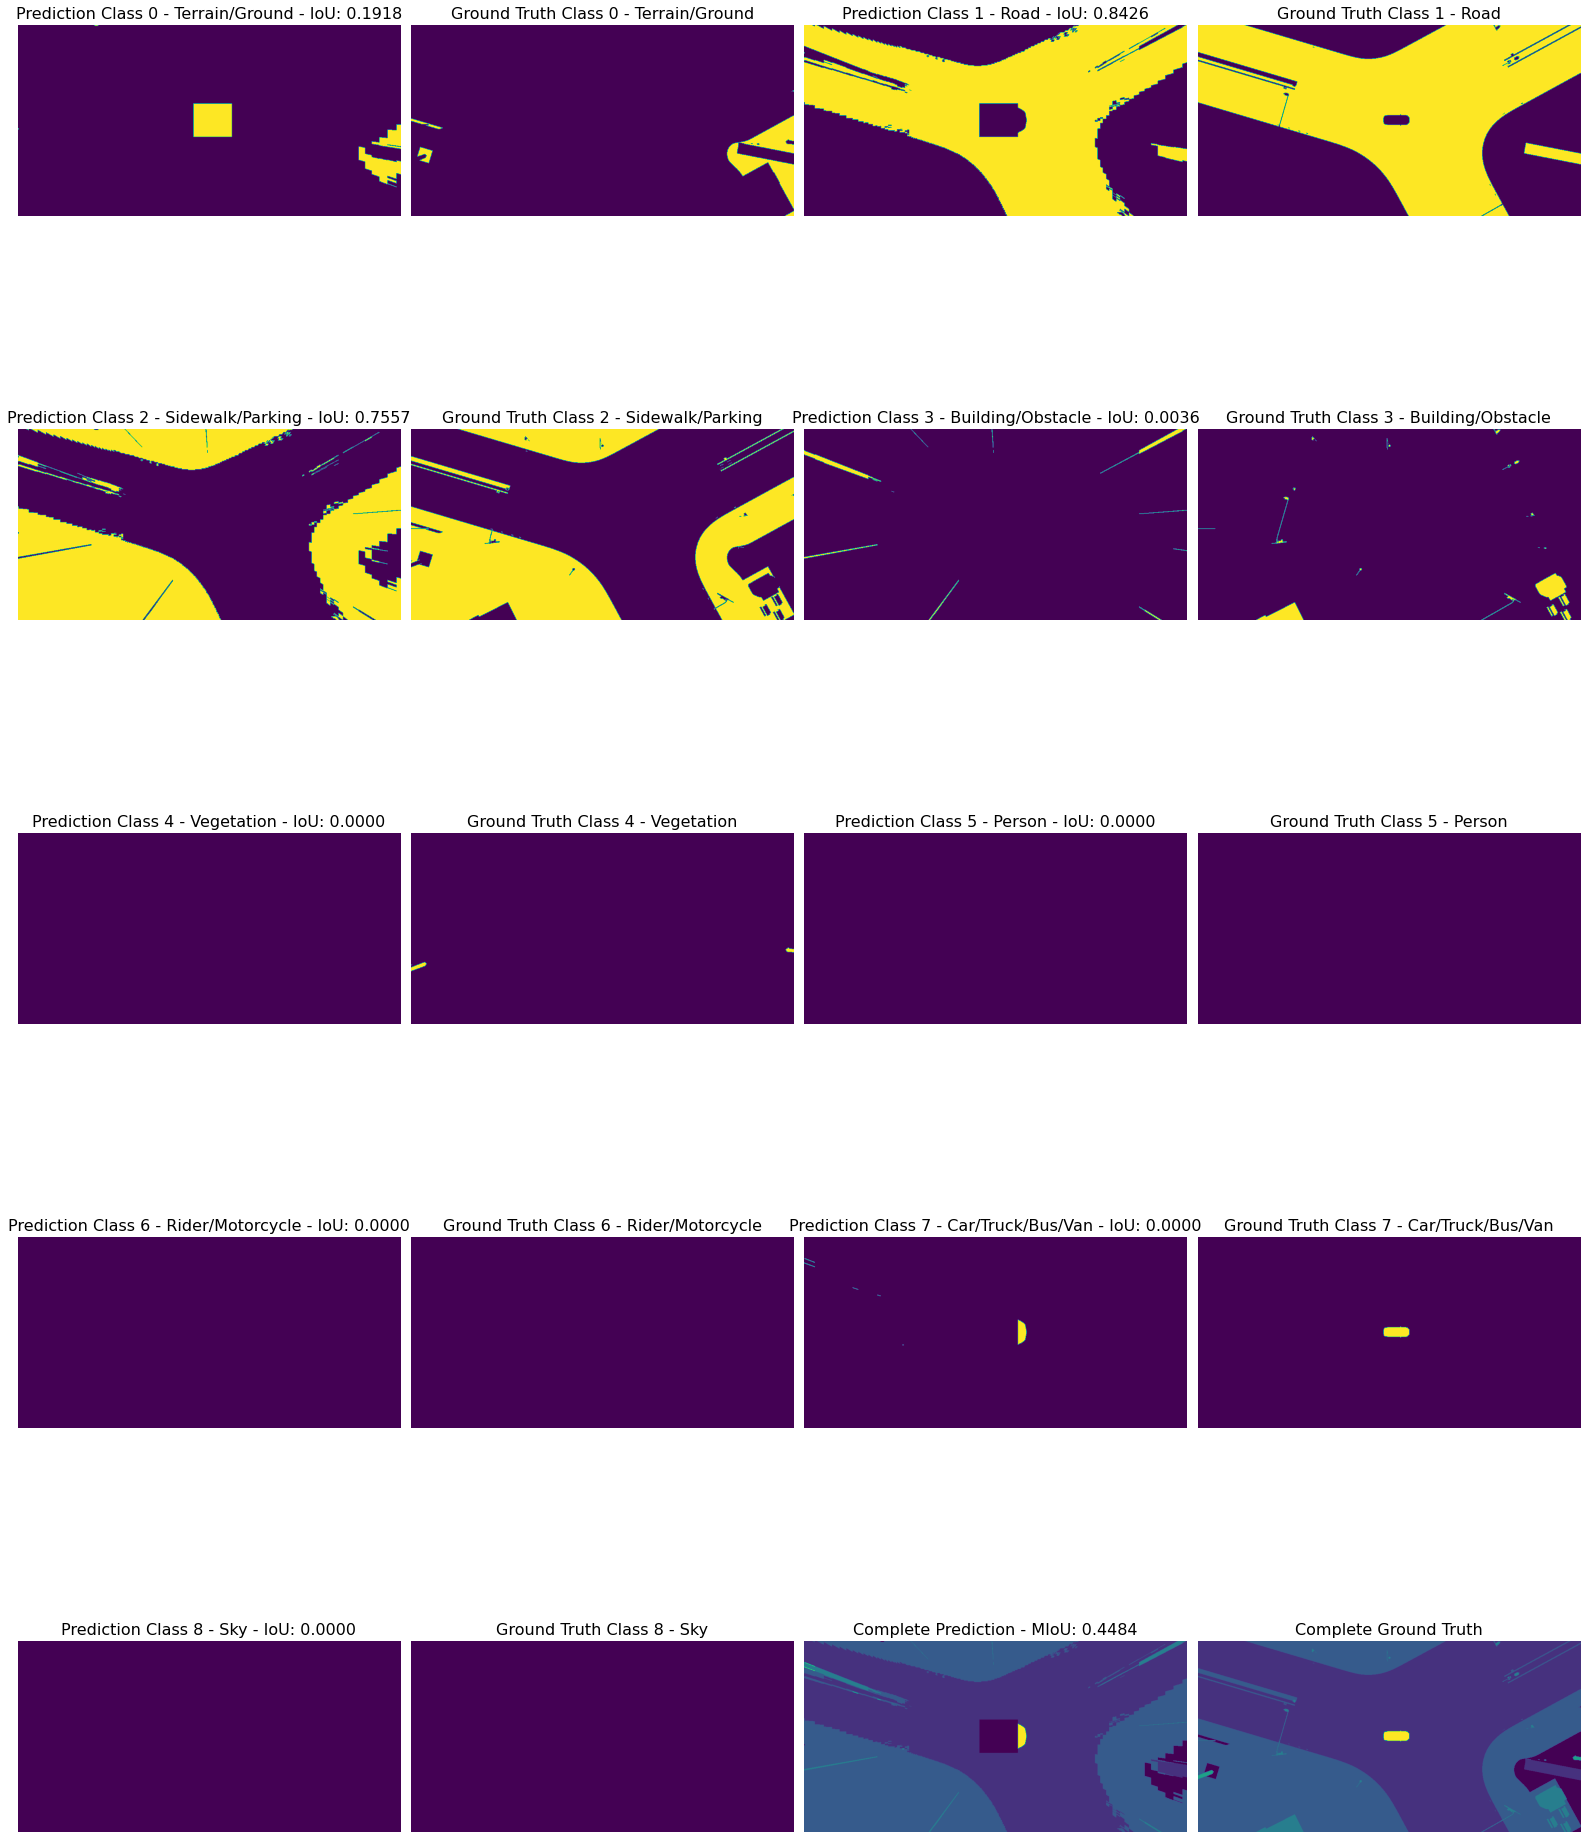

In [25]:
evaluation.plot_binary_segmentation_with_ious(ipm_image, ground_truth_image)

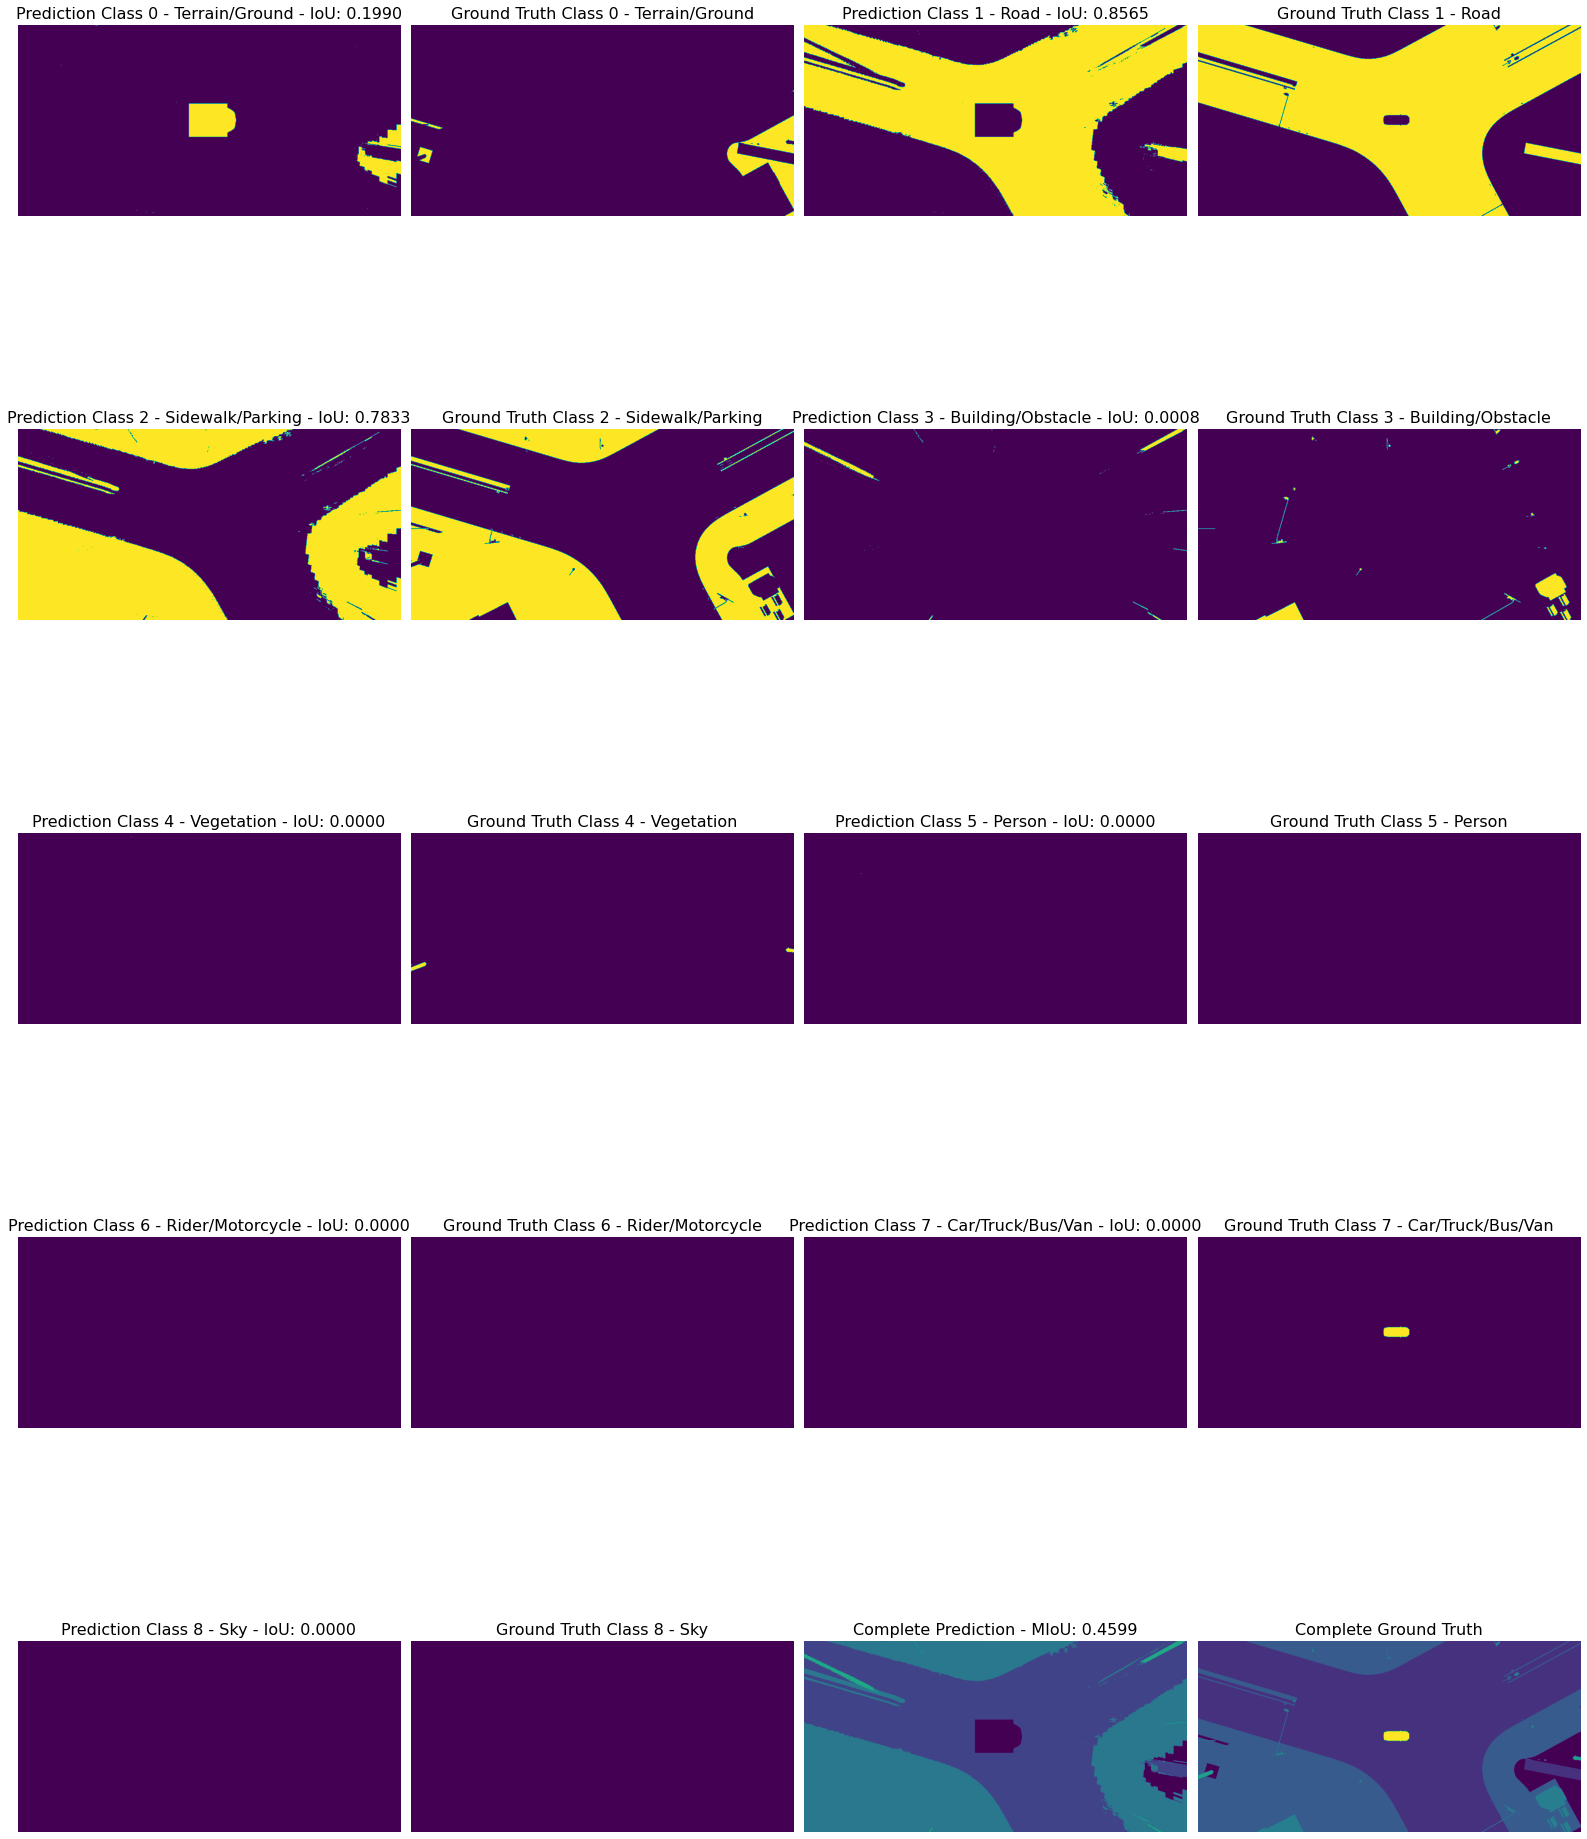

In [26]:
evaluation.plot_binary_segmentation_with_ious(fused_image, ground_truth_image)

## Discussion and Conclusion

As a result of our project, we developed an enhanced Inverse Perspective Mapping tool capable of fusing semantically segmented BEV images from multiple timestamps.

Throughout our assessment of the TS-IPM algorithm, its potential to enhance environmental representation, especially in comparison to the traditional single-shot IPM method, became evident. By segmenting our analysis into distinct categories like flat-world regions, static objects, and dynamic objects, we gained insights into the algorithm's capabilities across different environmental components.

The TS-IPM method notably reduced distortions of vertically extended objects, such as trees and poles. Furthermore, it mitigated artifacts typically introduced during the IPM process and improved the resolution drop seen with increasing distance.

However, the algorithm faced challenges. In scenes with larger objects, like cars, there was a discernible reduction in performance. More critically, representing dynamic entities, especially pedestrians, remained a challenge, given their unpredictable movement patterns that aren't currently factored into the TS-IPM's temporal fusion.

Yet, in terms of overall performance gauged by the Mean IoU metric, the TS-IPM showcased commendable improvements. Specifically, the fused images demonstrated a 2.5% enhancement in MIoU over the traditional IPM when benchmarked against ground truth data.

In summation, while the TS-IPM algorithm marks clear advancements over traditional methods, areas for further refinement, especially in representing dynamic objects, remain. As the field of autonomous driving continues to grow, projects such as ours aim to contribute to the ongoing efforts of refining methodologies, with the hope of supporting safer and more consistent autonomated driving.   

Here, we present a video of the output from the TS-IPM algorithm on a scene taken from the IKA dataset-
![](additional_data/report_images/final_video.gif)

## Future Works

#### 1 - **Addressing the Alignment Problem:**

**Problem:** The current model does not achieve perfect alignment.

**Potential Solutions:**
- **Consideration of Ego Vehicle Dynamics:** While we currently don't utilize roll and pitch angles, integrating such vehicle dynamics could enhance alignment accuracy. Moving from affine transformations, adopting homography based on these angles might offer better results.

- **Alignment Post Processing:** Implement techniques to eliminate minor misalignments. Consider leveraging Image Alignment (ECC) tools from frameworks like OpenCV2.

- **Dynamic Object Motion Compensation:** Incorporate methods to counteract the unpredictable movements of dynamic objects, ensuring consistent alignment and representation.

#### 2 - **Class Prioritization in the Algorithm:**

- **Prioritizing Taller Elements:** Given the bird's eye view perspective, taller elements are more prominently visible. By emphasizing taller world elements like trees in the algorithm, we can obtain a representation that closely resembles actual observations.

- **Road Pixel Prioritization for Road Map Creation**:By giving priority to road pixels during the fusion process, we can potentially generate accurate road maps. This approach would allow the elimination of other objects, ensuring a clear and distinct road representation.

#### **3 - Expand Data Resources:**

- **Datasets with More Instances:** Enrich the training and evaluation process by including larger datasets, possibly integrating public datasets like KITTI.
Regular Time Steps: Ensure that data is captured at consistent time intervals to maintain uniformity in temporal analysis.

#### **4- Integration of Neural Networks/Transformers:**

- **Networks for Sub-tasks:** Neural networks and transformers can be incorporated to tackle specific sub-tasks, such as:
    - Alignment: Improve the alignment accuracy of images across timestamps.
    - Fusing: Enhance the fusing process for a more integrated and coherent representation.


## References

[1] Reiher, Lennart, Bastian Lampe, and Lutz Eckstein. "A sim2real deep learning approach for the transformation of images from multiple vehicle-mounted cameras to a semantically segmented image in bird’s eye view." 2020 IEEE 23rd International Conference on Intelligent Transportation Systems (ITSC). IEEE, 2020.

[2] Mallot, H.A., Bülthoff, H.H., Little, J.J. et al. Inverse perspective mapping simplifies optical flow computation and obstacle detection. Biol. Cybern. 64, 177–185 (1991).

[3] Roddick, Thomas, and Roberto Cipolla. "Predicting semantic map representations from images using pyramid occupancy networks." Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition. 2020.

[4] Ammar Abbas, Syed, and Andrew Zisserman. "A geometric approach to obtain a bird's eye view from an image." Proceedings of the IEEE/CVF international conference on computer vision workshops. 2019.

[5] Can, Yigit Baran, et al. "Understanding bird’s-eye view of road semantics using an onboard camera." IEEE Robotics and Automation Letters 7.2 (2022): 3302-3309.

[6] Palazzi, Andrea, et al. "Learning to map vehicles into bird’s eye view." Image Analysis and Processing-ICIAP 2017: 19th International Conference, Catania, Italy, September 11-15, 2017, Proceedings, Part I 19. Springer International Publishing, 2017.

[7] Pan, Bowen, et al. "Cross-view semantic segmentation for sensing surroundings." IEEE Robotics and Automation Letters 5.3 (2020): 4867-4873.

[8] Zhu, Xinge, et al. "Generative adversarial frontal view to bird view synthesis." 2018 International conference on 3D Vision (3DV). IEEE, 2018.

[9] Gosala, Nikhil and Abhinav Valada. "Bird’s-eye-view panoptic segmentation using monocular frontal view images." IEEE Robotics and Automation Letters 7.2 (2022): 1968-1975.

[10] Philion, Jonah, and Sanja Fidler. "Lift, splat, shoot: Encoding images from arbitrary camera rigs by implicitly unprojecting to 3d." Computer Vision–ECCV 2020: 16th European Conference, Glasgow, UK, August 23–28, 2020, Proceedings, Part XIV 16. Springer International Publishing, 2020.

[11] Huang, Junjie, and Guan Huang. "Bevdet4d: Exploit temporal cues in multi-camera 3d object detection." arXiv preprint arXiv:2203.17054 (2022).

[12] Ma, Yuexin, et al. "Vision-centric bev perception: A survey." arXiv preprint arXiv:2208.02797 (2022).